In [1]:
%matplotlib inline
from sampler import Sampler
import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = [20, 10]

## 1. Run the sampler on sim with perfect redundancy (case 0)


In [ ]:
sampler1 = Sampler(seed=99, niter=1000, random_the_long_way=False)
sampler1.load_nr_sim("/scratch3/users/hgarsden/catall/calibration_points/viscatBC", 
                    freq=9, time=9, remove_redundancy=False, initial_solve_for_x=False)
S = np.eye(sampler1.nant()*2-1)*0.01
V_mean = sampler1.vis_redcal.V_model
Cv = np.eye(V_mean.size*2)
sampler1.set_S_and_V_prior(S, V_mean, Cv)
sampler1.run()


In [ ]:
sampler1.fix_degeneracies()
sampler1.plot_gains()

### Plot the correlation matrix, only where values are highly correlated

Blue is correlated, red is anti-correlated.

In [ ]:
sampler1.plot_covcorr(["g", "V"], threshold=0.8)

In [ ]:
sampler1.plot_marginals("g", 5, ["Redcal", "Sampled"])

### Plot the calibrated visibilites against the true visibilities

The true visibibilities are what I call the "model" V generated by the first step of the non-redundant pipeline before gains/noise are applied.

The calibrated visibilities are obtained by dividing the observed visibilities by the baseline gains from calibration and sampling:  d/[g(1+x)]. There are two sets of 
calibrated visibilities:
1. From redcal. There are no x values
2. From sampling. There are x values as well as gains.

The true visibilities are on the x-axis and the calibrated visibility is on the y-axis. There are three lines plotted
1. A line that has slope 1 (1:1) as a guide.
2. From redcal.
3. From sampling.

They are in different colours but we'll find that they are all on top of each other.

There 2 plots - one for amplitude and one for phase.


In [ ]:
sampler1.plot_results()

## 2. Use a sim from the non-redundant pipeline, but redundancy is not enforced in the sampling

The redundancy is removed by putting every baseline into its own redundant group

In [ ]:
sampler2 = Sampler(seed=99, niter=10000, random_the_long_way=False)
sampler2.load_nr_sim("/scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02", 
                    freq=9, time=9, remove_redundancy=True, initial_solve_for_x=False)

S = np.eye(sampler2.nant()*2-1)*0.01
V_mean = sampler2.vis_redcal.V_model
# Try V_obs/g_redcal for V_mean
Cv = np.eye(V_mean.size*2)
sampler2.set_S_and_V_prior(S, V_mean, Cv)
start_time = time.time()
sampler2.run()
print("Run time", (time.time()-start_time)/60, "minutes")

In [ ]:
sampler2.plot_gains()

In [ ]:
sampler2.plot_covcorr(["x", "V"], threshold=0.0)
# Also plot like this but the means 

In [ ]:
sampler2.plot_covcorr(["x", "V"], threshold=0.8)

In [ ]:
sampler2.plot_results()

### Plot gains

There are 3 sets:
1. g_true. There are no x offsets
2. g_redcal. There are no x offsets
3. g_sampled. There are x offsets. The maximum likelihood x offsets from the sampling are used. The x offsets are applied to the redcal gains: g = g_bar(1+x).

Two plots - amplitude and phase. Error bars are on the sampled results based on 3-sigma.

In [ ]:
sampler2.plot_gains()
# Don't use the degeneracy fix in the non-redundant pipeline after redcal. But then apply them after the sampler (can look at results
# with/without.
# Add the chi2 best solution.

## 3. Use the same sim as in 2., but force redundancy in sampling

This means there are fewer model V values fitted. The number of V values is the number of redundant groups not the number of baselines.

In [ ]:
sampler3 = Sampler(seed=99, niter=10000, random_the_long_way=False)
sampler3.load_nr_sim("/scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02", 
                    time=9, freq=9, remove_redundancy=False, initial_solve_for_x=False)

S = np.eye(sampler3.nant()*2-1)*0.01
V_mean = sampler3.vis_redcal.V_model
Cv = np.eye(V_mean.size*2)
sampler3.set_S_and_V_prior(S, V_mean, Cv)
start_time = time.time()
sampler3.run()
print("Run time", (time.time()-start_time)/60, "minutes")

In [ ]:
sampler3.plot_covcorr(threshold=0.0)

In [ ]:
sampler3.plot_covcorr(threshold=0.8)

In [ ]:
sampler3.plot_results()

In [ ]:
sampler3.plot_gains()

## 4. Different file - outlier

In [16]:
sampler4 = Sampler(seed=99, niter=10000, random_the_long_way=False, best_type="hist")
sampler4.load_nr_sim("/scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1", 
                    freq=9, time=9, remove_redundancy=False, initial_solve_for_x=False)

S = np.eye(sampler4.nant()*2-1)*0.01
V_mean = sampler4.vis_redcal.V_model
Cv = np.eye(V_mean.size*2)
sampler4.set_S_and_V_prior(S, V_mean, Cv)
start_time = time.time()
sampler4.run()
print("Run time", (time.time()-start_time)/60, "minutes")

Loading NR sim from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1
Get V_obs from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g.uvh5
Get model from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g_cal_dict.npz


Telescope hera_sim is not in known_telescopes.


Get noise from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_nn.uvh5
Get true model from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1.uvh5
Get true gains from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1.calfits
Get V_obs from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g.uvh5
Running sampling


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


Run time 0.46520593961079915 minutes


1.53508404224573e-05


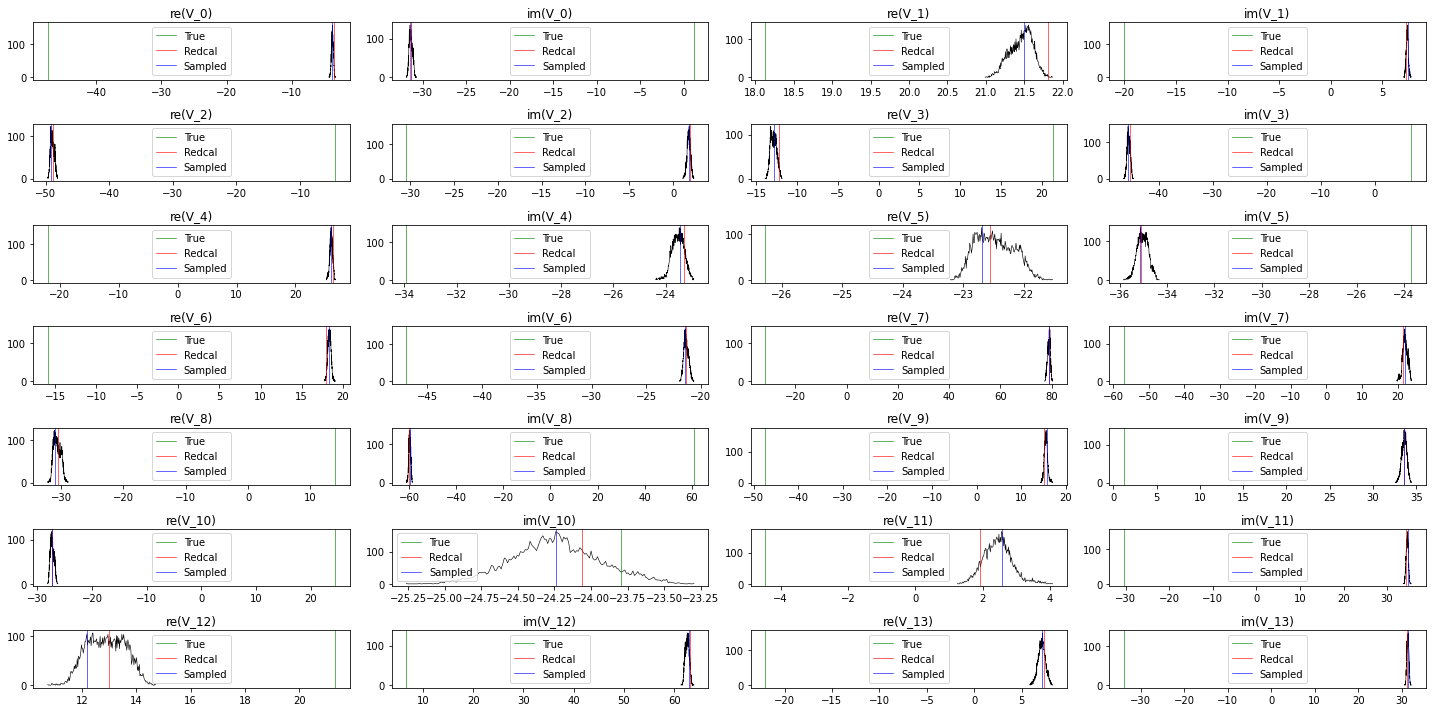

In [19]:
print(sampler4.vis_sampled.get_unnormalized_likelihood(unity_N=True))
sampler4.plot_marginals("V", which=["True", "Redcal", "Sampled"],cols=4)

In [ ]:
sampler4.plot_covcorr(["g", "V"])

In [ ]:
sampler4.fix_degeneracies()

In [ ]:
sampler4.plot_gains()

In [ ]:
sampler4.plot_covcorr(["g", "V"], threshold=0.8)

In [ ]:
sampler4.plot_marginals("g")